In [104]:
#手写体数字识别作业
import numpy as np
import matplotlib.pyplot as plt
import ipynb_importer
from dataLoader import loadMnist

导入数据

In [105]:
train_images_path = './dataset/train-images-idx3-ubyte.gz'
train_labels_path = './dataset/train-labels-idx1-ubyte.gz'
test_images_path = './dataset/t10k-images-idx3-ubyte.gz'
test_labels_path = './dataset/t10k-labels-idx1-ubyte.gz'
(tmp_image, tmp_label), (test_image, test_label) = loadMnist(train_images_path, train_labels_path, test_images_path, test_labels_path)
train_num = 50000
valid_num = 10000
test_num = 10000
train_image = tmp_image[:train_num]
valid_image = tmp_image[train_num:]
train_label = tmp_label[:train_num]
valid_label = tmp_label[train_num:]

In [106]:
def show_train(index):
    plt.imshow(train_image[index].reshape(28,28), cmap = 'gray')
    print('label:{}'.format(train_label[index].argmax()))
def show_valid(index):
    plt.imshow(valid_image[index].reshape(28,28), cmap = 'gray')
    print('label:{}'.format(valid_label[index].argmax()))
def show_test(index):
    plt.imshow(test_image[index].reshape(28,28), cmap = 'gray')
    print('label:{}'.format(test_label[index].argmax()))

label:2


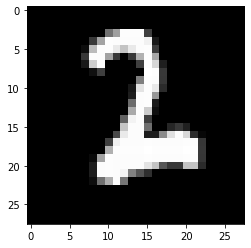

In [107]:
show_train(np.random.randint(50000))

In [108]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
num_neurons = [784,256,256,10]
 
W1 = np.random.normal(scale = 0.01, size = (num_inputs, num_hiddens))#784*256
B1 = np.zeros(num_hiddens)#256
W2 = np.random.normal(scale = 0.01, size = (num_hiddens, num_hiddens))#256*256
B2 = np.zeros(num_hiddens)#256
W3 = np.random.normal(scale = 0.01, size = (num_hiddens, num_outputs))#256*10
B3 = np.zeros(num_outputs)#10
W = [W1, W2, W3]
B = [B1, B2, B3]

In [109]:
def ReLU(X):
    #激活函数
    return(np.maximum(0,X))

def deReLU(X):
    #激活函数的导数
    X[X<=0] = 0
    X[X>0] = 1
    return X

In [110]:

# def MLP_net(X, W1, B1, W2, B2, W3, B3):
#     H1 = ReLU(np.dot(X, W1) + B1)
#     H2 = ReLU(np.dot(H1, W2) + B2)
#     return ReLU(np.dot(H2, W3) + B3)


In [111]:
#交叉熵损失函数
def cross_entropy_loss(output, label):
    delta = 1e-7 #防止出现log（0）的情况
    print(output)
    return -np.sum(label * np.log(output + delta))

In [112]:
def forward(image, label, W, B, num_neurons):
    weight_net = []
    output_net = []
    num_layer = len(num_neurons)
    for i in range(num_layer):
        weight_net.append(np.zeros(num_neurons[i]))
        output_net.append(np.zeros(num_neurons[i]))
    output_net[0] = image
    for j in range(1, num_layer):
        weight_net[j] = np.dot(output_net[j-1], W[j-1]) +B[j-1]
        output_net[j] = ReLU(weight_net[j])
    output = output_net[num_layer-1]
    # if np.sum(output) != 0:
    #     output = output / np.sum(output)
    #loss = cross_entropy_loss(output, label)
    return weight_net, output_net, output

def backward(W, B, label, num_neurons, weight_net, output_net, output, loss, learning_rate):
    num_layer = len(num_neurons)
    grad = []
    for i in range(num_layer):
        grad.append(np.zeros(num_neurons[i]))
    for j in range(num_layer-1, 0, -1):#3-1
        if j == num_layer-1:
            grad[j] = -(label/(output+1e-10)) * deReLU(weight_net[j])
            W[j-1] -= np.outer(output_net[j-1],grad[j]) * learning_rate
            B[j-1] -= grad[j] * learning_rate
        else:
            grad[j] = np.dot(W[j], grad[j+1]) * deReLU(weight_net[j])
            W[j-1] -= np.outer(output_net[j-1],grad[j]) * learning_rate
            B[j-1] -= grad[j] * learning_rate
    return W, B

def train(image_set, label_set, W, B, num_neurons, train_iter = 1000000):
    learning_rate = 0.0001
    accur = 0
    right_num = 0
    tested_num = 0
    loss = 10
    for i in range(train_iter):
        index = np.random.randint(50000)
        img = train_image[index]
        label = train_label[index]
        weight_net, output_net, output = forward(img, label, W, B, num_neurons)
        if output.argmax() == label.argmax():
            right_num += 1
        tested_num += 1
        accur = right_num/tested_num
        if i%10000 == 0:
            print("Training iter:{}".format(i))
            print("Training accuracy:{}".format(accur))
            loss = cross_entropy_loss(output, label)
            print("Loss:{}".format(loss))
            accur = 0
            right_num = 0
            tested_num = 0
        W, B = backward(W, B, label, num_neurons, weight_net, output_net, output, loss, learning_rate)
    

In [113]:
train(train_image, train_label, W, B, num_neurons)

Training iter:0
Training accuracy:1.0
[0.00095332 0.         0.         0.         0.00126298 0.
 0.00060088 0.         0.00245486 0.        ]
Loss:6.009645934681593
Training iter:10000
Training accuracy:0.0963
[158.46054678   0.         184.9823433    0.         160.31736958
 161.30973478   0.           0.         163.07819993 165.0856837 ]
Loss:16.11809565095832
Training iter:20000
Training accuracy:0.0978
[363.21058506   0.         390.70166662   0.         364.01840043
 352.73805484   0.           0.         361.38920463 370.4252964 ]
Loss:-5.865725727488192
Training iter:30000
Training accuracy:0.1005
[693.08948333   0.         728.79180063   0.         694.6943459
 668.29616864   0.           0.         690.34406732 700.83767018]
Loss:-6.552276291426947
Training iter:40000
Training accuracy:0.1006
[622.0232987    0.         648.51139504   0.         626.23270273
 600.47552126   0.           0.         618.84111598 624.03994518]
Loss:16.11809565095832
Training iter:50000
Training 

KeyboardInterrupt: 